In [5]:
import numpy as np
import pandas as pd

In [7]:
df = pd.read_csv("../data/raw_calls.csv")
df.tail()

,call_id,arrival_ts,interval_idx,queue,wait_t,handle_t,sentiment,csat,sla_met,resolution
5,3fb28d28-47c,2025-08-01 00:00:35,1,BILLING,19,207,Positive,4.0,True,Unresolved
6,edcbe6a6-ae2,2025-08-01 00:01:30,1,SALES,17,399,Negative,2.0,True,Unresolved
7,78b366b6-70a,2025-08-01 00:01:45,1,SUPPORT,22,452,Neutral,3.0,False,Unresolved
8,a29b1ace-998,2025-08-01 00:01:52,1,BILLING,25,219,Positive,NaN,False,Unresolved
9,420ff37f-e94,2025-08-01 00:01:39,1,SALES,28,309,Negative,NaN,False,Unresolved


In [3]:
df['date'] = pd.to_datetime(df['date'])

df['time'] = pd.to_datetime(df['time'], format="%H:%M:%S").dt.time


for i in 'call_id', 'agent_id', 'customer_id':
    df[i] = df[i].astype('string')
    
df['queue'] = df['queue'].astype('category')
df['sentiment'] = df['sentiment'].astype('category')
df['sentiment'] = df['sentiment'].cat.add_categories(["unknown"]).fillna("unknown")

df['interval'] = df['interval'].astype('int8')
# I chose to keep null values in csat_score for data integrity.
# So I used Int8 as a data type as it allows for null values as opposed to int8.
df['csat'] = df['csat'].astype('Int8') 

df = df.drop_duplicates(subset=['call_id'])
df['queue'] = df['queue'].cat.remove_unused_categories()
df['sentiment'] = df['sentiment'].cat.remove_unused_categories()

,call_id,agent_id,queue,date,time,interval,wait_t,abandoned,customer_id,handle_t,resolution_t,resolved,fcr,sentiment,csat
0,41d3710b-03eb,agent_98,support,2025-08-01,00:12:00,1,26,False,cust_5004019,243,269,True,False,Negative,<NA>
1,ce54cbbf-94dc,agent_86,billing,2025-08-01,00:11:00,1,12,False,cust_8276484,279,291,True,True,Neutral,<NA>
2,af097378-22e2,agent_20,customer service,2025-08-01,00:21:00,1,103,False,cust_3667060,528,631,True,True,Positive,5
3,fe951596-60d2,agent_95,customer service,2025-08-01,00:29:00,1,2,False,cust_4372082,236,238,True,True,Neutral,5
4,bc1549d1-86c1,agent_39,support,2025-08-01,00:02:00,1,40,False,cust_8049187,1106,1146,True,False,Neutral,<NA>


In [55]:
call_volume = len(df)
avg_csat = df['csat'].mean()
avg_csat = f"{avg_csat:,.2f}"
aht = pd.to_timedelta(df['handle_t'].mean(), unit="s")
aht= str(aht).split()[-1].split(".")[0]
resolution_rate = len(df[df['resolved'] == True])/call_volume *100
resolution_rate = f"{resolution_rate:,.2f}%"
fcr = len(df[df['fcr'] == True])/call_volume *100
fcr = f"{fcr:,.2f}%"
calls_per_day = df.groupby('date').size().reset_index(name='call_volume')
calls_per_interval = df.groupby('interval').size().reset_index(name='call_volume')
calls_by_csat = df.groupby('csat').size().reset_index(name='call_volume')
print(calls_per_day)

         date  call_volume
0  2025-08-01         4789
1  2025-08-02         6678
2  2025-08-03         6712
3  2025-08-04         4957
4  2025-08-05         4700
5  2025-08-06         4731
6  2025-08-07         4811
7  2025-08-08         4856
8  2025-08-09         6889
9  2025-08-10         6923
10 2025-08-11         4931
11 2025-08-12         4837
12 2025-08-13         4903
13 2025-08-14         4932


<Axes: >

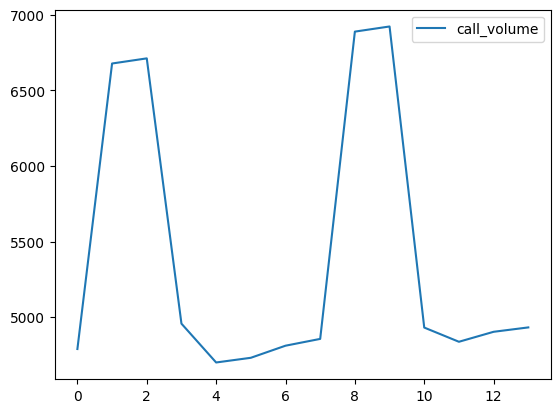

In [54]:
sns.lineplot(calls_per_day)